## STOCKHOLM TEAM

# Customer Churn Analysis and Prediction using Classification

# Business Understanding

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

## Data Understanding

Following describes the columns present in the data.

**Gender --** Whether the customer is a male or a female

**SeniorCitizen --** Whether a customer is a senior citizen or not

**Partner --** Whether the customer has a partner or not (Yes, No)

**Dependents --** Whether the customer has dependents or not (Yes, No)

**Tenure --** Number of months the customer has stayed with the company

**Phone Service --** Whether the customer has a phone service or not (Yes, No)

**MultipleLines --** Whether the customer has multiple lines or not

**InternetService --** Customer's internet service provider (DSL, Fiber Optic, No)

**OnlineSecurity --** Whether the customer has online security or not (Yes, No, No Internet)

**OnlineBackup --** Whether the customer has online backup or not (Yes, No, No Internet)

**DeviceProtection --** Whether the customer has device protection or not (Yes, No, No internet service)

**TechSupport --** Whether the customer has tech support or not (Yes, No, No internet)

**StreamingTV --** Whether the customer has streaming TV or not (Yes, No, No internet service)

**StreamingMovies --** Whether the customer has streaming movies or not (Yes, No, No Internet service)

**Contract --** The contract term of the customer (Month-to-Month, One year, Two year)

**PaperlessBilling --** Whether the customer has paperless billing or not (Yes, No)

**Payment Method --** The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

**MonthlyCharges --** The amount charged to the customer monthly

**TotalCharges --** The total amount charged to the customer

**Churn --** Whether the customer churned or not (Yes or No)

# Hypothesis

## Null Hypothesis (HO): 
#### Customers with longer tenure (i.e., those who have been with the company for a longer time) are less likely to churn compared to customers with shorter tenure.

## Alternative Hypothesis (HA): 
#### Customers with shorter tenure are more likely to churn compared to customers with longer tenure.

## Exploratory Data Analysis

# Questions

## Research Questions
1. What is the churn rate among customers? How many customers have churned (Yes) versus those who haven't (No)?

2. How does the distribution of churn ('Yes' and 'No') vary across different categories of the predictor variable?

3. What are the distributions and summaries of monthly charges, and total charges for the customer base, and are there any notable outliers in these distributions?

4. What is the average monthly charges and total charges for customers who churned and those who didn't?

5. What is the churn rate based on the tenure of customers with the company?

6. What is the distribution of monthly charges for customers who churned versus those who did not churn?

7. How does the distribution of total charges incurred by customers relate to churn rates?

8. Is there a correlation between MonthlyCharges, TotalCharges, and customer churn?

9. How do the various combinations of factors like tenure, monthly charges, total charges, payment method, contract term, etc. affect churn?


# Installation

In [1]:
%pip install pandas as pd
%pip install pyodbc  
%pip install python-dotenv 
%pip install openpyxl
%pip install seaborn
%pip install matplotlib
%pip install imbalanced-learn
%pip install xgboost
%pip install scikit-learn
%pip install plotly
%pip install imbalanced-learn
%pip install --upgrade pip
%pip install --upgrade nbformat
%pip install jinja2
%pip install xgboost



Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

# Importation

In [2]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from sklearn.impute import SimpleImputer
import numpy as np
warnings.filterwarnings('ignore')

import matplotlib.ticker as mticker
%matplotlib inline
import plotly.express as px
color = sns.color_palette()
import matplotlib.colors as mcolors
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.io import write_html
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection
sklearn.model_selection.KFold
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Data Loading

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = "DRIVER={ODBC Driver 17 for SQL Server};SERVER={dap-projects-database.database.windows.net};DATABASE={dapDB};UID={dataAnalyst_LP2};PWD={A3g@3kR$2y}"


# connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [5]:

#This query retrieves all columns from the table 'LP2_Telco_churn_first_3000'
query = "Select * from dbo.LP2_Telco_churn_first_3000"
#Execute the query and store the results in the DataFrame 'df1'
df1 = pd.read_sql(query, connection)

In [6]:
df1 = pd.DataFrame(df1)

## Test dataset.

In [7]:
excel_file = 'Telco-churn-second-2000.xlsx'

# Read the Excel file into a Pandas DataFrame
df2 = pd.read_excel(excel_file, engine='openpyxl')

# Save the DataFrame as a CSV file
df2.to_csv('data1.csv', index=False)

In [8]:
df3 = pd.read_csv('LP2_Telco-churn-last-2000.csv')

## Exploratory Data Analysis: EDA

In [9]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [10]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [12]:
df1.shape

(3000, 21)

In [13]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,3000,3000,0280-XJGEX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,3000,2,Male,1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,3000,2,False,2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,3000,2,False,1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,3000,2,False,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,3000,NaN,NaN,NaN,32.5273,24.6378,0,9,29,56,72
PhoneService,3000,2,True,2731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,2731,2,False,1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,3000,3,Fiber optic,1343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,2349,2,False,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop Duplicates

In [15]:
# Checking Duplicate Values
len(df1[df1.duplicated()])

0

In [16]:
df1.drop_duplicates(subset=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], inplace=True)

In [17]:
df1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [18]:
# Calculate the % of missing values in the dataset
missing_values_percent = df1.isna().mean().round(4) * 100
print(missing_values_percent)

customerID           0.00
gender               0.00
SeniorCitizen        0.00
Partner              0.00
Dependents           0.00
tenure               0.00
PhoneService         0.00
MultipleLines        8.97
InternetService      0.00
OnlineSecurity      21.70
OnlineBackup        21.70
DeviceProtection    21.70
TechSupport         21.70
StreamingTV         21.70
StreamingMovies     21.70
Contract             0.00
PaperlessBilling     0.00
PaymentMethod        0.00
MonthlyCharges       0.00
TotalCharges         0.17
Churn                0.03
dtype: float64


### Extracting categorical and numerical columns¶

In [19]:
cat_col=[col for col in df1.columns if df1[col].dtype=="object"]
num_col=[col for col in df1.columns if df1[col].dtype!="object"]

In [20]:
for col in cat_col:
    print(f"{col} has {df1[col].unique()} values\n")
    

customerID has ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '1891-FZYSA' '4770-UEZOX'
 '1A1:U3001038-RQOST'] values

gender has ['Female' 'Male'] values

MultipleLines has [None False True] values

InternetService has ['DSL' 'Fiber optic' 'No'] values

OnlineSecurity has [False True None] values

OnlineBackup has [True False None] values

DeviceProtection has [False True None] values

TechSupport has [False True None] values

StreamingTV has [False True None] values

StreamingMovies has [False True None] values

Contract has ['Month-to-month' 'One year' 'Two year'] values

PaymentMethod has ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] values

Churn has [False True None] values



### Impute Missing Values

In [21]:
# Fill Null with mode in categorical dataset
columns_to_fill = ['MultipleLines',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

for column in columns_to_fill:
    df1[column].fillna(df1[column].mode()[0], inplace=True)

In [22]:
#change the dtype for SeniorCitizen column to be same as other datasets
df1['SeniorCitizen'] = df1['SeniorCitizen'].astype(int)

In [23]:
# change dtype from bool to object in categorical columns
cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Convert bool to str in df2
for col in cols:
    df1[col] = df1[col].astype(str)

# Consistent representation
for col in cols:
    df1[col] = df1[col].map({'True': 'Yes', 'False': 'No'})

In [24]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [25]:
for col in num_col:
    print(f"{col} has {df1[col].unique()} values\n")
    

SeniorCitizen has [0 1] values

Partner has ['Yes' 'No'] values

Dependents has ['No' 'Yes'] values

tenure has [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] values

PhoneService has ['No' 'Yes'] values

PaperlessBilling has ['Yes' 'No'] values

MonthlyCharges has [29.85000038 56.95000076 53.84999847 ... 33.90000153 34.
 38.59999847] values

TotalCharges has [  29.85000038 1889.5         108.15000153 ... 6143.14990234  144.80000305
  414.95001221] values



In [26]:
# Calculate the first quartile (Q1) and third quartile (Q3) of the TotalCharges column
q1 = df1['TotalCharges'].quantile(0.25)
q3 = df1['TotalCharges'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the lower and upper bounds for identifying potential outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify potential outliers
outliers = df1[(df1['TotalCharges'] < lower_bound) | (df1['TotalCharges'] > upper_bound)]

# Print the potential outliers
print(f'There are {outliers.shape[0]} outliers in TotalCharges.')

There are 0 outliers in TotalCharges.


In [27]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

In [28]:
replace_mapping = {'Yes': 1, 'No': 0}

# List of columns where you want to replace values
columns_to_replace = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']  # Add other column names

# Loop through the specified columns and replace values
for column in columns_to_replace:
    df1[column] = df1[column].replace(replace_mapping)

In [29]:
# Define the tenure group categories and corresponding labels
tenure_bins = [0, 12, 24, 36, 48, 60, 72, 80]
tenure_labels = ['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72', '73 - 80']

# Create a new column 'TenureGroup' with the categorized values
df1['TenureGroup'] = pd.cut(df1['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Print the DataFrame with the new 'TenureGroup' column


In [30]:
df1['TenureGroup'].value_counts()

1 - 12     873
61 - 72    486
13 - 24    447
25 - 36    387
49 - 60    328
37 - 48    312
73 - 80    167
Name: TenureGroup, dtype: int64

In [31]:
#drop column customerID
df1.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [32]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
TenureGroup         0
dtype: int64

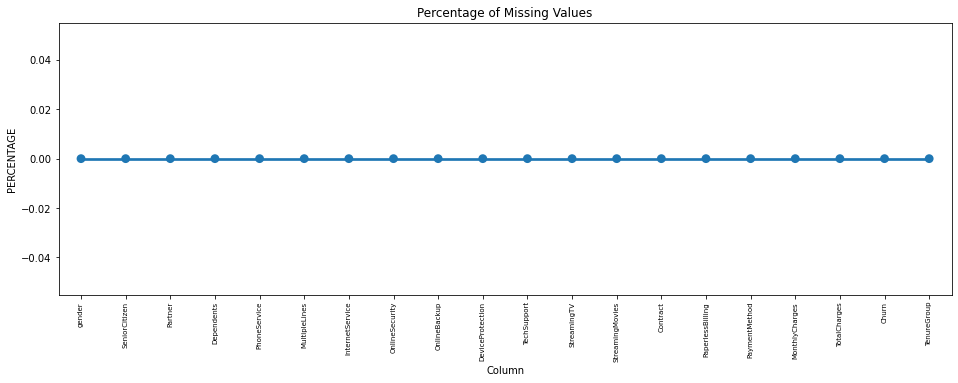

In [33]:
# Calculate the percentage of missing values
missing = pd.DataFrame((df1.isnull().sum()) * 100 / df1.shape[0]).reset_index()
missing.columns = ['Column', 'Missing Percentage']

# Create the point plot
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Missing Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

In [34]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,1,0,0,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850000,29.850000,No,1 - 12
1,Male,0,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950001,1889.500000,No,25 - 36
2,Male,0,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.849998,108.150002,Yes,1 - 12
3,Male,0,0,0,0,No,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.299999,1840.750000,No,37 - 48
4,Female,0,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.699997,151.649994,Yes,1 - 12


## Testing Data

In [35]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [36]:
df2.shape

(2000, 20)

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [38]:
df2.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2000.000000,2000.000000,2000.000000
mean,0.161500,31.853000,63.933325
std,0.368084,24.632677,30.136858
min,0.000000,0.000000,18.250000
25%,0.000000,8.000000,34.250000
50%,0.000000,27.000000,69.800000
75%,0.000000,55.000000,89.275000
max,1.000000,72.000000,118.750000


In [39]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

### Drop Duplicates

In [40]:
df2.duplicated().sum()

0

In [41]:
df2.drop_duplicates(subset=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'], inplace=True)

In [42]:
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'],errors = 'coerce')

In [43]:
df2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [44]:
Q1 = df2['TotalCharges'].quantile(0.25)
Q3 = df2['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df2[(df2['TotalCharges'] < lower_bound) | (df2['TotalCharges'] > upper_bound)]

print(f'There are {outliers.shape[0]} outliers in TotalCharges.')

There are 2 outliers in TotalCharges.


### Impute Missing Values

In [45]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df2.TotalCharges = imputer.fit_transform(df2["TotalCharges"].values.reshape(-1, 1))

In [46]:
# Define the tenure group categories and corresponding labels
tenure_bins = [0, 12, 24, 36, 48, 60, 72, 80]
tenure_labels = ['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72', '73 - 80']

# Create a new column 'TenureGroup' with the categorized values
df2['TenureGroup'] = pd.cut(df2['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Print the DataFrame with the new 'TenureGroup' column


In [47]:
df2['TenureGroup'].value_counts()

1 - 12     616
61 - 72    300
13 - 24    285
25 - 36    248
49 - 60    241
37 - 48    205
73 - 80    105
Name: TenureGroup, dtype: int64

In [48]:
df2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
TenureGroup         0
dtype: int64

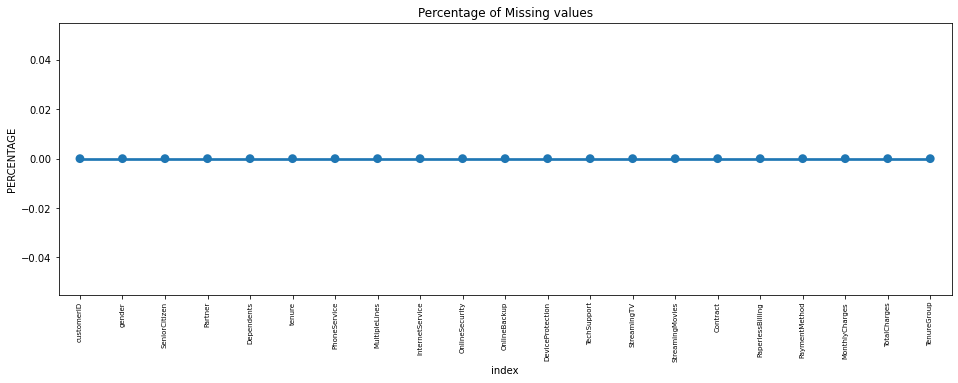

In [49]:
missing = pd.DataFrame((df2.isnull().sum())*100/df2.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [50]:
df2.drop(columns=['customerID','TenureGroup'], index=2, inplace=True)

In [51]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
5,Female,1,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.30,459.95


In [52]:
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [53]:
df3.shape

(2043, 21)

In [54]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [55]:
df3.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2043.000000,2043.000000,2043.000000
mean,0.168380,32.649046,64.712555
std,0.374295,24.376248,29.970010
min,0.000000,0.000000,18.550000
25%,0.000000,9.000000,35.825000
50%,0.000000,30.000000,70.250000
75%,0.000000,55.000000,89.625000
max,1.000000,72.000000,118.350000


In [56]:
df3.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Drop Duplicates

In [57]:
df3.duplicated().sum()

0

In [58]:
df3.drop_duplicates(subset=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], inplace=True)

In [59]:
df3.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Convert TotalCharges to numeric datatype

In [60]:
df3['TotalCharges'] = pd.to_numeric(df3['TotalCharges'],errors = 'coerce')

## Check for outliers in the TotalCharges  column

In [61]:
Q1 = df3['TotalCharges'].quantile(0.25)
Q3 = df3['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df3[(df3['TotalCharges'] < lower_bound) | (df3['TotalCharges'] > upper_bound)]

print(f'There are {outliers.shape[0]} outliers in TotalCharges.')

There are 0 outliers in TotalCharges.


### Impute Missing Values

In [62]:
# The imputer will replace missing values with the mean of the non-missing values for the respective column

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df3.TotalCharges = imputer.fit_transform(df3["TotalCharges"].values.reshape(-1, 1))

To better understand customer churn patterns, we categorize customers into tenure groups. For example, customers with less than a year's tenure are grouped as '1-12', and those with one to two years' tenure as '13-24'. This categorization aids in revealing trends and insights related to customer churn across different tenure periods.

In [63]:
# Define the tenure group categories and corresponding labels
tenure_bins = [0, 12, 24, 36, 48, 60, 72, 80]
tenure_labels = ['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72', '73 - 80']

# Create a new column 'TenureGroup' with the categorized values
df3['TenureGroup'] = pd.cut(df3['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Print the DataFrame with the new 'TenureGroup' column


In [64]:
df3['TenureGroup'].value_counts()

1 - 12     580
61 - 72    335
13 - 24    315
49 - 60    251
25 - 36    241
37 - 48    231
73 - 80     90
Name: TenureGroup, dtype: int64

In [65]:
df3.drop(columns =['customerID','tenure'],axis=1, inplace=True)

In [66]:
df3.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
TenureGroup         0
dtype: int64

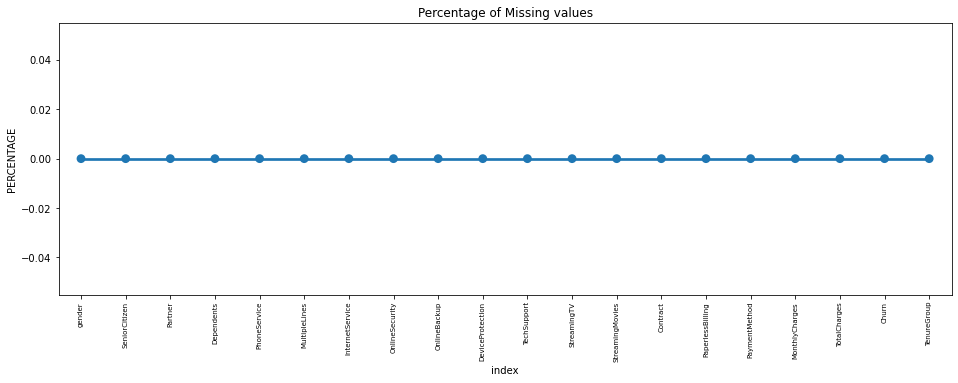

In [67]:
missing = pd.DataFrame((df3.isnull().sum())*100/df3.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## After Cleaning Concatenate First Dataset and Third Dataset. Do not include the Test Dataset

In [68]:
data=pd.concat([df1,df3])

In [69]:
# Reseting the index of the concatenated data frame
data.to_csv('df.csv', index=False)

In [70]:
data.shape

(5043, 20)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            5043 non-null   object  
 1   SeniorCitizen     5043 non-null   int64   
 2   Partner           5043 non-null   object  
 3   Dependents        5043 non-null   object  
 4   PhoneService      5043 non-null   object  
 5   MultipleLines     5043 non-null   object  
 6   InternetService   5043 non-null   object  
 7   OnlineSecurity    5043 non-null   object  
 8   OnlineBackup      5043 non-null   object  
 9   DeviceProtection  5043 non-null   object  
 10  TechSupport       5043 non-null   object  
 11  StreamingTV       5043 non-null   object  
 12  StreamingMovies   5043 non-null   object  
 13  Contract          5043 non-null   object  
 14  PaperlessBilling  5043 non-null   object  
 15  PaymentMethod     5043 non-null   object  
 16  MonthlyCharges    5043 n

## Univariate Analysis

1. What is the churn rate among customers? How many customers have churned (Yes) versus those who haven't (No)?

In [72]:
churn_count = df1['Churn'].value_counts()
print(churn_count)

No     2220
Yes     780
Name: Churn, dtype: int64


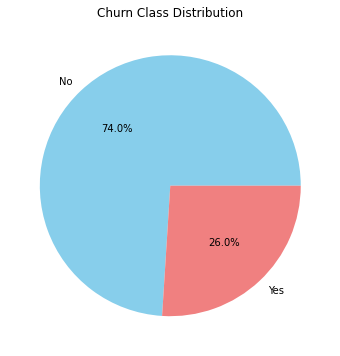

In [73]:
# Assuming the DataFrame is loaded and named 'df1'
churn_count = df1['Churn'].value_counts()

# Calculate the percentage of each churn class
churn_percentage = (churn_count / churn_count.sum()) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_percentage, labels=churn_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Churn Class Distribution')
plt.show()


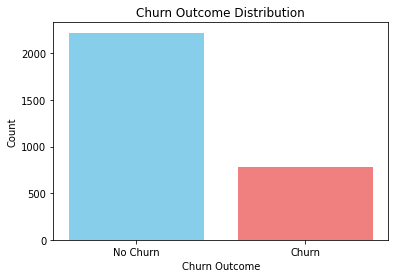

In [74]:
# Assuming the DataFrame is loaded and named 'df1'
churn_count = df1['Churn'].value_counts()

# Create a bar plot for churn outcome distribution
plt.bar(churn_count.index, churn_count.values, color=['skyblue', 'lightcoral'])
plt.xlabel('Churn Outcome')
plt.ylabel('Count')
plt.title('Churn Outcome Distribution')
plt.xticks(churn_count.index, ['No Churn', 'Churn'])
plt.show()

The class distribution of the churn prediction is imbalanced, with a majority of instances belonging to the "NO" class (74.0%) and a minority belonging to the "YES" class (26.0%). This imbalance suggests that the dataset contains significantly more instances of customers who did not churn ("NO") compared to those who did churn ("YES").

Imbalanced class distribution can impact the performance of machine learning models, particularly if the minority class is underrepresented. Addressing this imbalance might involve techniques such as resampling, using different evaluation metrics, or applying specialized algorithms that handle imbalanced data.

### Multivariate Analysis

2. How does the distribution of churn ('Yes' and 'No') vary across different categories of the predictor variable?

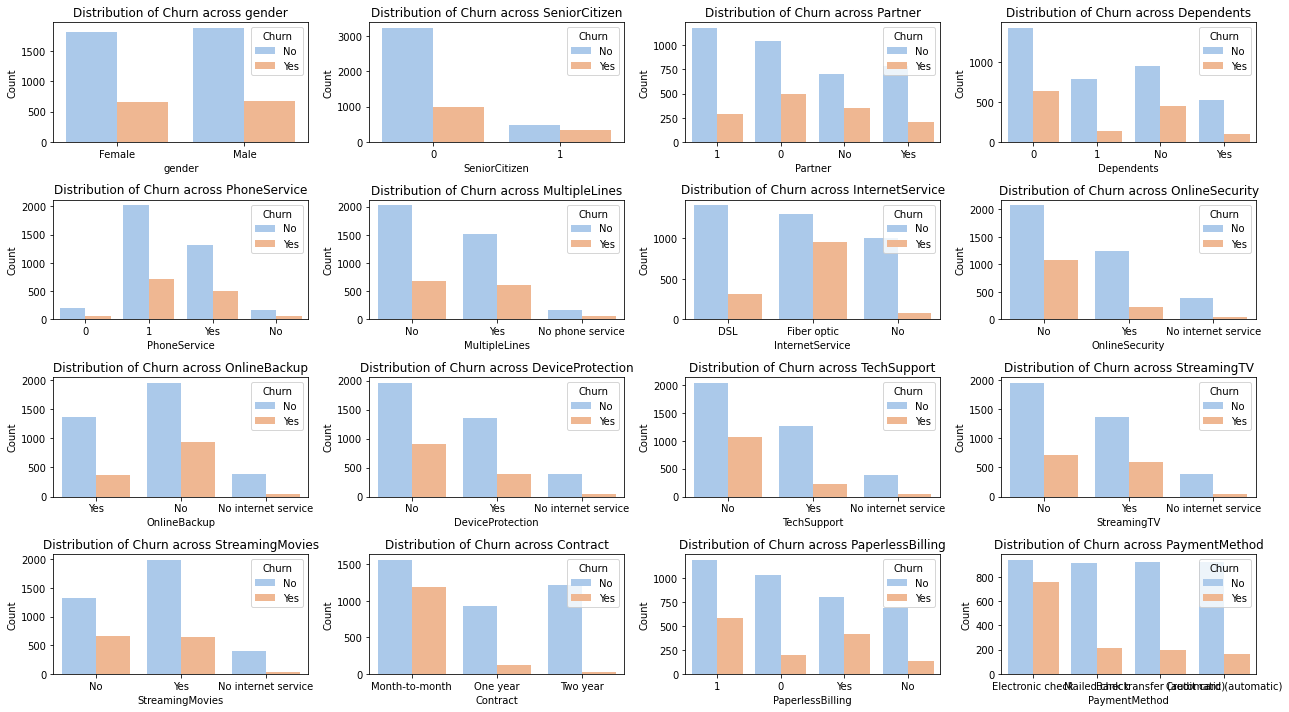

In [75]:
# List of categorical predictor variable columns
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

# Set the figure size
plt.figure(figsize=(18, 10))

# Loop through each categorical predictor variable and create count plots
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=data, x=col, hue='Churn', palette='pastel')
    plt.title(f'Distribution of Churn across {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()


3. What are the distributions and summaries of monthly charges, and total charges for the customer base, and are there any notable outliers in these distributions?

In [76]:
# Create subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2)

# box plot for 'MonthlyCharges'
fig.add_trace(
    go.Box(y=data['MonthlyCharges'], name='MonthlyCharges', marker_color='midnightblue', line_color='rgb(8, 48, 107)', line_width=1.5),
    row=1, col=1)

# box plot for 'TotalCharges'
fig.add_trace(
    go.Box(y=data['TotalCharges'], name='TotalCharges', marker_color='midnightblue', line_color='rgb(8, 48, 107)', line_width=1.5),
    row=1, col=2)

# Update layout
fig.update_layout(height=400, width=1200, title_text="Descriptive Statistics of Monthly Charges and Total Charges")
fig.show()

## **Bivariate Analysis** (analysis involving two variables)

4. What is the average monthly charges and total charges for customers who churned and those who didn't according ?

In [77]:
# Calculate the average monthly charges and total charges for customers who churned and those who didn't
churn_stats = data.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].mean()
# Print the results
print("Average Monthly Charges and Total Charges by Churn Status:")
print(churn_stats)

Average Monthly Charges and Total Charges by Churn Status:
       MonthlyCharges  TotalCharges
Churn                              
No          61.442690   2567.150874
Yes         75.211003   1566.522643


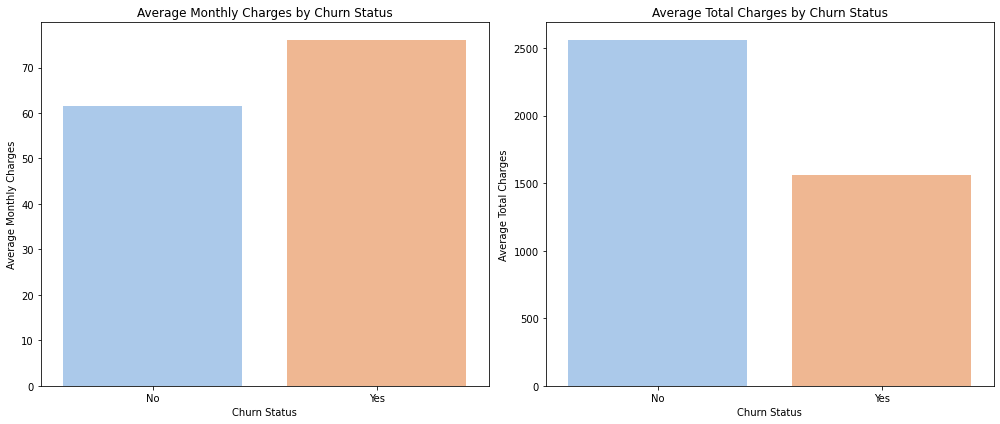

In [102]:
churn_stats = df1.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].mean()

# Create subplots for average monthly charges and average total charges
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot average monthly charges
sns.barplot(data=churn_stats.reset_index(), x='Churn', y='MonthlyCharges', palette='pastel', ci=None, ax=axes[0])
axes[0].set_title("Average Monthly Charges by Churn Status")
axes[0].set_xlabel("Churn Status")
axes[0].set_ylabel("Average Monthly Charges")

# Plot average total charges
sns.barplot(data=churn_stats.reset_index(), x='Churn', y='TotalCharges', palette='pastel', ci=None, ax=axes[1])
axes[1].set_title("Average Total Charges by Churn Status")
axes[1].set_xlabel("Churn Status")
axes[1].set_ylabel("Average Total Charges")

# Adjust layout and display the subplots
plt.tight_layout()
plt.savefig('/home/florence/Documents/LP2_customer_churn_analysis_sprint2/img/Average Total Charges_by_charn_Status.png')  # Change the filename and extension as needed

plt.show()



5. What is the churn rate based on the tenure of customers with the company?

In [79]:

# First, you need to group your data by tenure and Churn columns
grouped = data.groupby(['TenureGroup', 'Churn']).size().unstack(fill_value=0)
# Calculate churn rate for each tenure group
grouped['Churn Rate'] =( grouped['Yes'] / (grouped['Yes'] + grouped['No']))*100

print(grouped['Churn Rate'])

TenureGroup
1 - 12     48.451480
13 - 24    30.183727
25 - 36    21.019108
37 - 48    19.705341
49 - 60    15.198618
61 - 72     9.013398
73 - 80     0.389105
Name: Churn Rate, dtype: float64


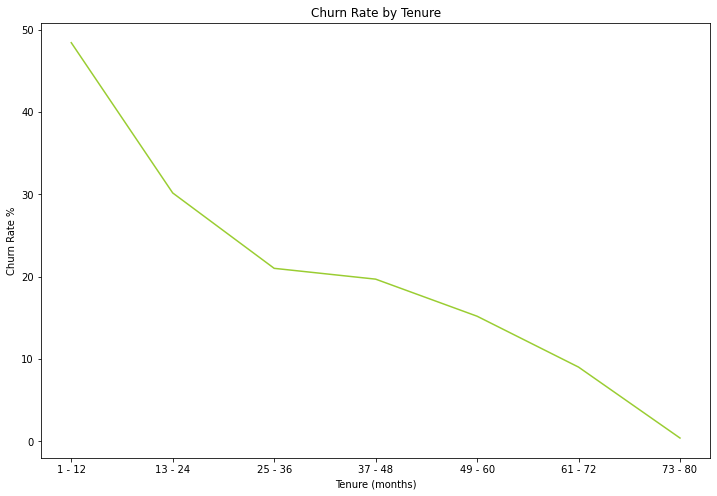

In [80]:
# Plot the churn rate against tenure
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped, x='TenureGroup', y='Churn Rate', color= 'yellowgreen')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate %')
# Save the image
plt.savefig('/home/florence/Documents/LP2_customer_churn_analysis_sprint2/img/churn_rate_by_tenure.png')  # Change the filename and extension as needed
plt.show()

The churn rate is calculated as the percentage of customers that have churned in each group. From the data, we can observe that the churn rate decreases as the tenure increases. For example, the churn rate for customers who stayed between 1 to 12 months is about 48%, while it's about 7% for customers who stayed between 61 to 72 months. This suggests that newer customers are more likely to churn compared to long-time customers.

6. What is the distribution of monthly charges for customers who churned versus those who did not churn?

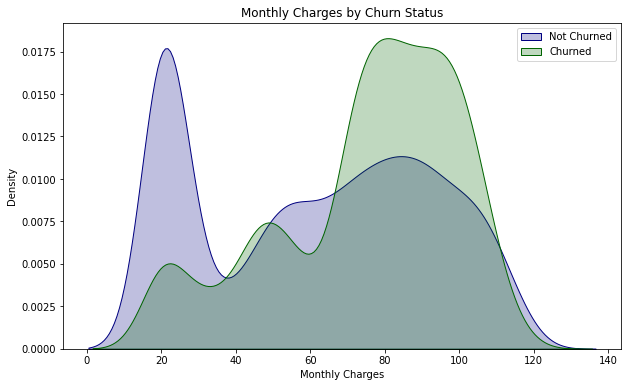

In [81]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the KDE for MonthlyCharges by churn status
sns.kdeplot(data=data[data["Churn"] == "No"]["MonthlyCharges"], color="navy", fill=True, label="Not Churned")
sns.kdeplot(data=data[data["Churn"] == "Yes"]["MonthlyCharges"], color="darkgreen", fill=True, label="Churned")

# Set labels and title
plt.ylabel('Density')
plt.xlabel('Monthly Charges')
plt.title('Monthly Charges by Churn Status')

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.show()


Churn is high when Monthly Charges are high

7. How does the distribution of total charges incurred by customers relate to churn rates?

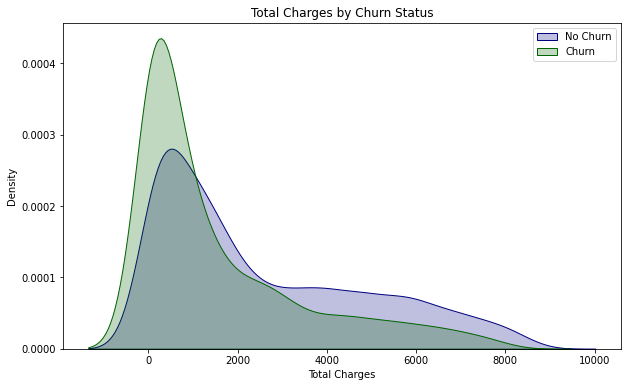

In [82]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the KDE for TotalCharges by churn status
sns.kdeplot(data=data[data["Churn"] == "No"]["TotalCharges"], color="navy", fill=True, label="No Churn")
sns.kdeplot(data=data[data["Churn"] == "Yes"]["TotalCharges"], color="darkgreen", fill=True, label="Churn")

# Set labels and title
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.title('Total Charges by Churn Status')

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

Higher Churn at lower Total Charges.

## **Multivariate Analysis** (analysis involving more than two variables):

8. Is there a correlation between MonthlyCharges, TotalCharges, and customer churn?

In [83]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)

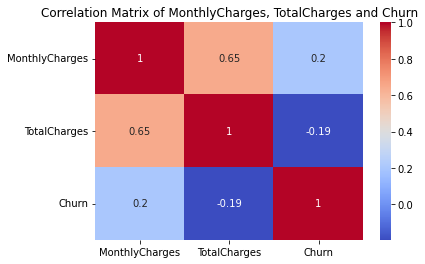

In [84]:
# Select columns
columns = ['MonthlyCharges', 'TotalCharges', 'Churn']
# Calculate correlation matrix
corr_matrix = data[columns].corr()
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of MonthlyCharges, TotalCharges and Churn')
plt.show()

9. How do the various combinations of factors like tenure, monthly charges, total charges, payment method, contract term, etc. affect churn?

Convert all the categorical variables into dummy variables

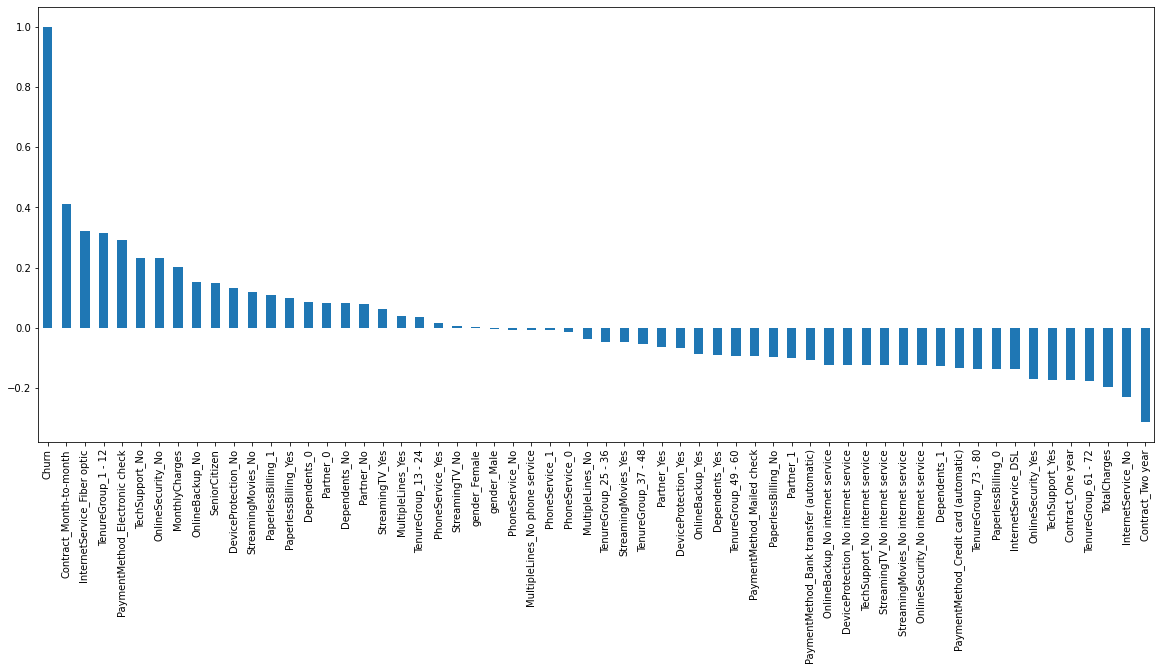

In [85]:
df_dm = pd.get_dummies(data)
plt.figure(figsize=(20,8))
df_dm.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');

In [86]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,1,0,0,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850000,29.850000,0,1 - 12
1,Male,0,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950001,1889.500000,0,25 - 36
2,Male,0,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.849998,108.150002,1,1 - 12
3,Male,0,0,0,0,No,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.299999,1840.750000,0,37 - 48
4,Female,0,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.699997,151.649994,1,1 - 12


## Feature Processing & Engineering

### Features Encoding


### New Features Creation

In [87]:
# Extract numeric columns from the original data
numeric_cols = data.select_dtypes(include=['number'])

# Perform one-hot encoding for other categorical columns
dummies = []
cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod']

for col in cols:
    dummies.append(pd.get_dummies(data[col], prefix=col, prefix_sep='_'))

categorical_dummies = pd.concat(dummies, axis=1)

# Concatenate one-hot encoded DataFrame with the numeric columns
data = pd.concat([numeric_cols, categorical_dummies], axis=1)

data.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.850000,29.850000,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,56.950001,1889.500000,0,0,1,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,53.849998,108.150002,1,0,1,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0,42.299999,1840.750000,0,0,1,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,70.699997,151.649994,1,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0


### Dataset Splitting and balancing data

Before training the models, we need to split the data between train and test. we'll also use the RandomUnderSampler class to balance the dataset. We'll then have both balanced and unbalanced training sets.

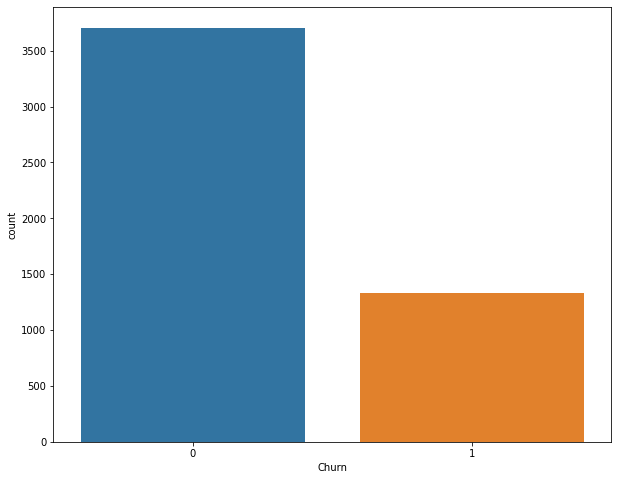

In [88]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data['Churn'])
plt.show()

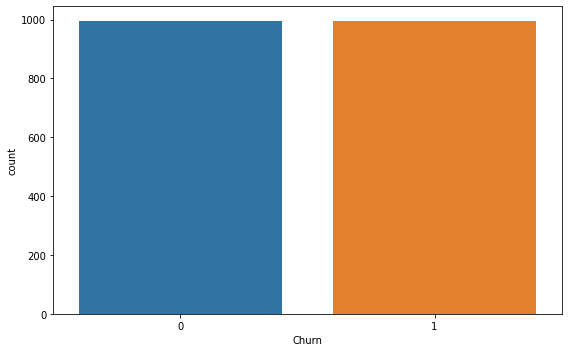

In [89]:
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y)

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X_train, y_train)

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y_rus)

plt.tight_layout()
plt.show()


In [90]:
data.shape

(5043, 37)

## Feature Scalling (Z-score normalization) StandardScaler

In [91]:
# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the features of the training data using the scaler
X_train = scaler.transform(X_train)

# Transform the features of the test data using the same scaler
X_test = scaler.transform(X_test)

# Transform the features of the undersampled training data using the same scaler
X_rus = scaler.transform(X_rus)

## Machine Learning Modeling and Metrics
We'll use different machines learning algorithms:
Decision Trees, Random forest, SVMs, Logistic regression,K-Nearest Neighbour

In [92]:

# Define the cross-validation strategy (5-fold cross-validation)
cv = 5

# Train and evaluate Logistic Regression models with balanced and unbalanced datasets
logreg_balanced = cross_validate(LogisticRegression(), X_rus, y_rus, cv=cv, scoring=['accuracy', 'recall', 'precision', 'f1'])
logreg_unbalanced = cross_validate(LogisticRegression(), X_train, y_train, cv=cv, scoring=['accuracy', 'recall', 'precision', 'f1'])

# Train and evaluate Decision Tree models with balanced and unbalanced datasets
trees_balanced = cross_validate(DecisionTreeClassifier(), X_rus, y_rus, cv=cv, scoring=['accuracy', 'recall', 'precision', 'f1'])
trees_unbalanced = cross_validate(DecisionTreeClassifier(), X_train, y_train, cv=cv, scoring=['accuracy', 'recall', 'precision', 'f1'])

# Train and evaluate Support Vector Machine models with balanced and unbalanced datasets
svm_balanced = cross_validate(SVC(), X_rus, y_rus, cv=cv, scoring=['accuracy', 'recall', 'precision', 'f1'])
svm_unbalanced = cross_validate(SVC(), X_train, y_train, cv=cv, scoring=['accuracy', 'recall', 'precision', 'f1'])

# Train and evaluate XGBoost models with balanced and unbalanced datasets
xgb_balanced = cross_validate(XGBClassifier(), X_rus, y_rus, cv=cv, scoring=['accuracy', 'recall', 'precision', 'f1'])
xgb_unbalanced = cross_validate(XGBClassifier(), X_train, y_train, cv=cv, scoring=['accuracy', 'recall', 'precision', 'f1'])

# Train and evaluate K-Nearest Neighbors models with balanced and unbalanced datasets
knn_balanced = cross_validate(KNeighborsClassifier(), X_rus, y_rus, cv=cv, scoring=['accuracy', 'recall', 'precision', 'f1'])
knn_unbalanced = cross_validate(KNeighborsClassifier(), X_train, y_train, cv=cv, scoring=['accuracy', 'recall', 'precision', 'f1'])

[06:11:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:11:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:11:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:11:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [93]:
# Storing the results in a DataFrame
summary = pd.DataFrame({
    'labels': ['accuracy', 'recall', 'precision', 'f1'],
    'logreg_balanced': [logreg_balanced['test_accuracy'].mean(), logreg_balanced['test_recall'].mean(), logreg_balanced['test_precision'].mean(), logreg_balanced['test_f1'].mean()],
    'logreg_unbalanced': [logreg_unbalanced['test_accuracy'].mean(), logreg_unbalanced['test_recall'].mean(), logreg_unbalanced['test_precision'].mean(), logreg_unbalanced['test_f1'].mean()],
    'trees_balanced': [trees_balanced['test_accuracy'].mean(), trees_balanced['test_recall'].mean(), trees_balanced['test_precision'].mean(), trees_balanced['test_f1'].mean()],
    'trees_unbalanced': [trees_unbalanced['test_accuracy'].mean(), trees_unbalanced['test_recall'].mean(), trees_unbalanced['test_precision'].mean(), trees_unbalanced['test_f1'].mean()],
    'svm_balanced': [svm_balanced['test_accuracy'].mean(), svm_balanced['test_recall'].mean(), svm_balanced['test_precision'].mean(), svm_balanced['test_f1'].mean()],
    'svm_unbalanced': [svm_unbalanced['test_accuracy'].mean(), svm_unbalanced['test_recall'].mean(), svm_unbalanced['test_precision'].mean(), svm_unbalanced['test_f1'].mean()],
    'xgb_balanced': [xgb_balanced['test_accuracy'].mean(), xgb_balanced['test_recall'].mean(), xgb_balanced['test_precision'].mean(), xgb_balanced['test_f1'].mean()],
    'xgb_unbalanced': [xgb_unbalanced['test_accuracy'].mean(), xgb_unbalanced['test_recall'].mean(), xgb_unbalanced['test_precision'].mean(), xgb_unbalanced['test_f1'].mean()],
    'knn_balanced': [knn_balanced['test_accuracy'].mean(), knn_balanced['test_recall'].mean(), knn_balanced['test_precision'].mean(), knn_balanced['test_f1'].mean()],
    'knn_unbalanced': [knn_unbalanced['test_accuracy'].mean(), knn_unbalanced['test_recall'].mean(), knn_unbalanced['test_precision'].mean(), knn_unbalanced['test_f1'].mean()]             
})

summary.set_index('labels', inplace=True)
summary.style.applymap(lambda x: 'background-color: blue' if x >= 0.7 else '')

,logreg_balanced,logreg_unbalanced,trees_balanced,trees_unbalanced,svm_balanced,svm_unbalanced,xgb_balanced,xgb_unbalanced,knn_balanced,knn_unbalanced
labels,,,,,,,,,,
accuracy,0.758291,0.799836,0.692965,0.736904,0.757789,0.796928,0.740201,0.785035,0.719598,0.768376
recall,0.786935,0.538693,0.690452,0.507538,0.798995,0.493467,0.770854,0.530653,0.774874,0.512563
precision,0.744553,0.643945,0.694474,0.500651,0.738743,0.649973,0.727704,0.604536,0.697999,0.566246
f1,0.764994,0.585612,0.692129,0.503920,0.767480,0.559927,0.747773,0.564216,0.733980,0.537339


## Hyperparameters Tunning

In [94]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True)

In [95]:
from sklearn.svm import SVC

# Define your data and kfold here

kfold = StratifiedKFold(n_splits=5, shuffle=True)

svm = SVC()

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10]  # Narrowed down range for C
              }

search = GridSearchCV(svm, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_rus, y_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')
     

Best recall: 0.8713567839195979 for {'C': 0.1, 'kernel': 'poly'}


In [96]:
log_reg = LogisticRegression()

param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.001, 0.01, 1, 10, 100]}

search = GridSearchCV(log_reg, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_rus, y_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')
     

Best recall: 0.8532663316582916 for {'C': 0.001, 'solver': 'liblinear'}


In [97]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, eval_metric='logloss')

param_grid = {'max_depth': range(1, 8, 1),
              'min_child_weight': range(1, 5, 1)}

search = GridSearchCV(xgb, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_rus, y_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

Best recall: 0.7969849246231157 for {'max_depth': 1, 'min_child_weight': 1}


In [98]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=1 , min_child_weight=1)

param_grid = {'gamma':[i/10.0 for i in range(0,5)]}

search = GridSearchCV(xgb, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_rus, y_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')
     


[06:14:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:14:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:14:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:14:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [99]:
xgb = XGBClassifier(n_estimators=100, max_depth=1 , min_child_weight=1, gamma=0)

param_grid = {'learning_rate':[0.001, 0.01, 0.1, 1]}

search = GridSearchCV(xgb, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_rus, y_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

[06:14:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:14:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:14:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:14:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[06:14:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.94      0.55      0.69       920
           1       0.43      0.90      0.58       341

    accuracy                           0.65      1261
   macro avg       0.68      0.73      0.64      1261
weighted avg       0.80      0.65      0.66      1261



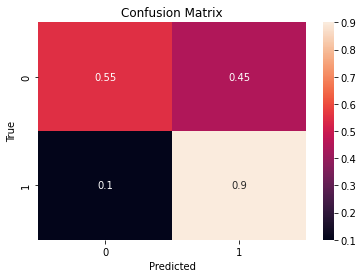

In [100]:
model_xgb = XGBClassifier(learning_rate=0.001, n_estimators=100, max_depth=1 , min_child_weight=1, gamma=0)
model_xgb.fit(X_rus, y_rus)
y_pred_xgb = model_xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('True')
ax.set_xlabel('Predicted')

plt.show()

              precision    recall  f1-score   support

           0       0.93      0.13      0.22       920
           1       0.29      0.97      0.45       341

    accuracy                           0.36      1261
   macro avg       0.61      0.55      0.34      1261
weighted avg       0.76      0.36      0.28      1261



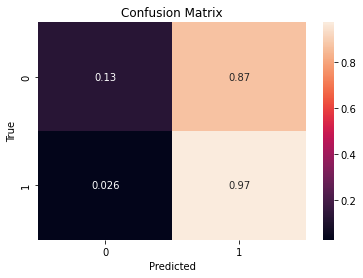

In [101]:
model_svm = SVC(kernel='poly', C=0.01)
model_svm.fit(X_rus, y_rus)
y_pred_svm = model_svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_svm, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('True')
ax.set_xlabel('Predicted')

plt.show()
     

### Simple Model #001

## Create the Model

### Train the Model

### Evaluate the Model on the Evaluation dataset (Evalset)

### Predict on a unknown dataset (Testset)

### Simple Model #002

### Create the Model

### Train the Model

### Evaluate the Model on the Evaluation dataset (Evalset)

### Predict on a unknown dataset (Testset)

### Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :


### Hyperparameters tuning

### Export key components